**In this noebook we are going to perform Image Classification Using KNN Classifier. We'll be using the MNIST dataset. Let's dig in and find out how does our classifer perform.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [2]:
# Load data
digits = load_digits()
X = digits.images
y = digits.target

In [3]:
# Print the number of samples and features
print("Number of samples:", len(X))
print("Number of features:", X.shape[1] * X.shape[2])

Number of samples: 1797
Number of features: 64


In [4]:
# Print the unique classes and their counts
unique, counts = np.unique(y, return_counts=True)
print("Unique classes and their counts:", dict(zip(unique, counts)))

Unique classes and their counts: {0: 178, 1: 182, 2: 177, 3: 183, 4: 181, 5: 182, 6: 181, 7: 179, 8: 174, 9: 180}


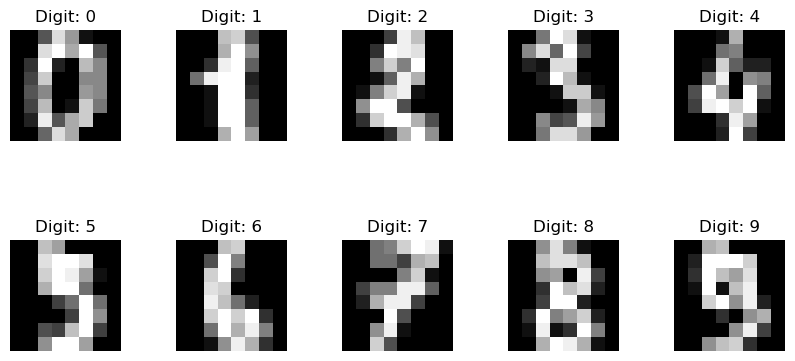

In [5]:
# Plot the first few images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()
for i in np.arange(0, 10):
    axes[i].imshow(X[i], cmap='gray')
    axes[i].set_title("Digit: %s" % y[i])
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

Plotting the distribution of classes in the MNIST dataset is a crucial step in Exploratory Data Analysis (EDA). The purpose of this analysis is to investigate whether the dataset is balanced, meaning each class (in this case, each digit from 0 to 9) has approximately an equal number of instances. An imbalanced dataset can lead to a bias in the machine learning model, causing it to perform well on the over-represented classes while performing poorly on the under-represented ones. By visualizing the class distribution, we can ensure that each class is adequately represented in our dataset. This informs our strategy for training the machine learning model and allows us to take corrective measures if necessary, such as data augmentation, resampling techniques or adjusting the class weights.

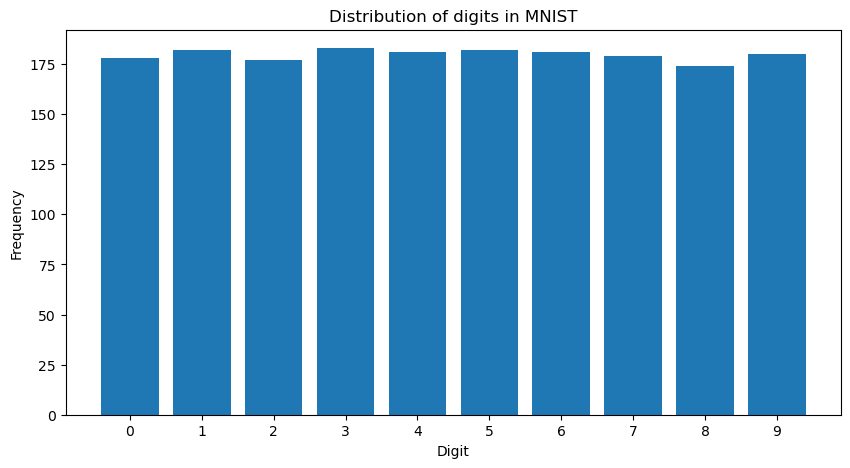

In [6]:
# Plot the distribution of classes
plt.figure(figsize=(10, 5))
plt.bar(unique, counts)
plt.xticks(unique)
plt.xlabel("Digit")
plt.ylabel("Frequency")
plt.title("Distribution of digits in MNIST")
plt.show()

This block of code is computing and visualizing the average image for each digit (0 through 9) in the MNIST dataset. The reason for doing this is to gain a deeper understanding of the common patterns that underlie each digit class. By averaging all images belonging to a particular class, we obtain a representative image that encapsulates the common traits of that digit as it appears in our dataset. These 'average images' provide us with a general outline or a "prototypical" digit that our model is likely to encounter. Observing these images can shed light on the unique characteristics of each digit and give us a visual intuition about the features that the model might need to learn to differentiate between the different classes effectively.

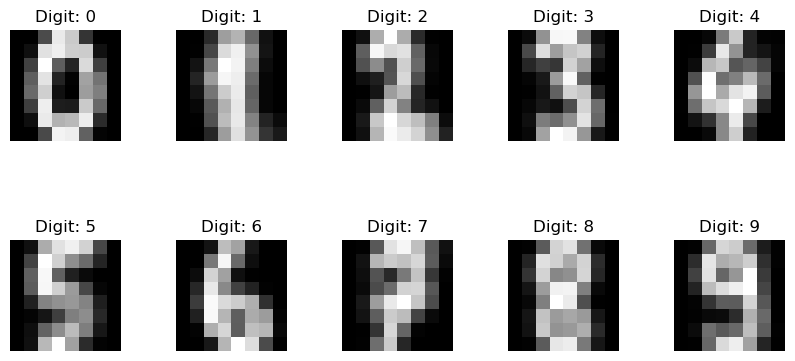

In [7]:
# Compute average images for each digit
avg_images = np.array([np.mean(X[y == i], axis=0) for i in range(10)])

# Plot average images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()
for i in np.arange(0, 10):
    axes[i].imshow(avg_images[i], cmap='gray')
    axes[i].set_title("Digit: %s" % i)
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

We perform this pixel intensity distribution analysis to better understand the distribution of pixel values across our MNIST dataset. By reshaping the 3D image data into a 2D array and subsequently flattening it to a 1D array, we can examine all pixel values collectively. The histogram then plots the frequency of these pixel values, ranging from 0 (black) to 255 (white). This provides insight into the general characteristics of our images. For example, if most pixel values are towards the lower end (near 0), it would indicate that our images are generally dark, with a few distinctive white areas representing the digits. This understanding can be useful for preprocessing steps, like normalization or standardization, and can also assist in refining our machine learning model by providing insight into the data it will learn from.


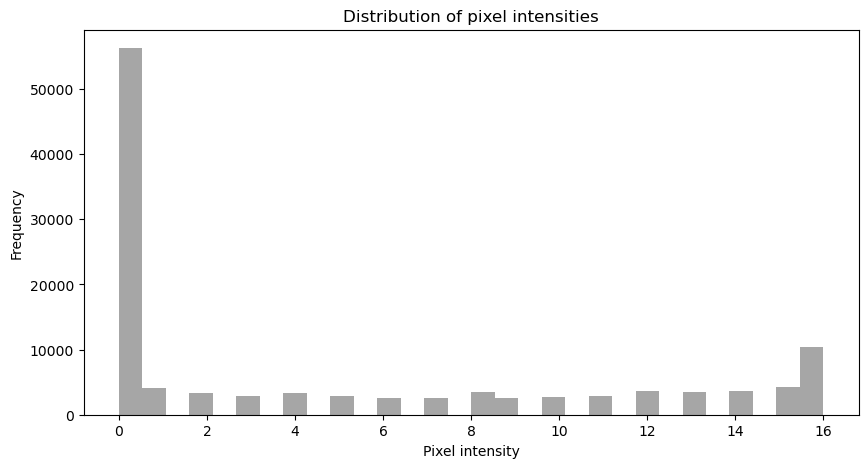

In [8]:
# Reshape X to 2D
X_2D = X.reshape(X.shape[0], -1)

# Histogram of pixel intensities
plt.figure(figsize=(10, 5))
plt.hist(X_2D.ravel(), bins=30, color='gray', alpha=0.7)
plt.title("Distribution of pixel intensities")
plt.xlabel("Pixel intensity")
plt.ylabel("Frequency")
plt.show()

t-SNE (t-Distributed Stochastic Neighbor Embedding) is a machine learning algorithm particularly suited for the visualization of high-dimensional datasets, like the MNIST data, which consists of images of 8x8 pixels (a 64-dimensional dataset). When it becomes impractical to visualize such high-dimensional data, dimensionality reduction techniques, like t-SNE, help to represent this data in 2D or 3D, preserving significant structures at different scales. The t-SNE visualization plotted here translates these high-dimensional digit images into 2D while maintaining the relative distances between different data points. Each point in the plot corresponds to an MNIST digit, and the color corresponds to the actual digit label. Clusters of similar data points of the same color indicate that digits of the same type have similar pixel intensity patterns. In summary, we use t-SNE to better understand and gain insights from our high-dimensional data by visually identifying clusters or groups of similar instances, and potentially, outliers.

/tmp/ipykernel_20/1026585127.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, edgecolor='none', alpha=0.7, cmap=plt.cm.get_cmap('nipy_spectral', 10))


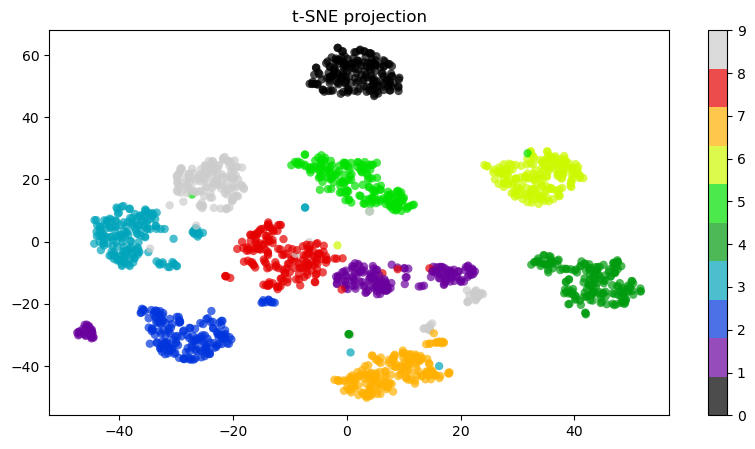

In [9]:
# t-SNE for visualization
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X_2D)
plt.figure(figsize=(10, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, edgecolor='none', alpha=0.7, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title("t-SNE projection")

# Show the plots
plt.show()

In [10]:
# Load data
digits = load_digits()
X = digits.images.reshape((len(digits.images), -1))
y = digits.target

In [11]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
# Define the hyperparameters
parameters = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

In [13]:
# Initialize the KNN model
knn = KNeighborsClassifier()

# Initialize the grid search
grid_search = GridSearchCV(knn, parameters, cv=5, scoring='accuracy')

# Fit the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(grid_search.best_params_)
print(grid_search.best_score_)

{'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
0.9881629887727449


In [14]:
# Train the model using the best parameters
knn_best = KNeighborsClassifier(**grid_search.best_params_)
knn_best.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
# Test the model
y_pred = knn_best.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.92      1.00      0.96        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        37
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       0.97      0.91      0.94        35
           9       1.00      0.94      0.97        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



Based on the classification report, the K-nearest neighbors (KNN) model exhibits excellent performance on the MNIST dataset. The model accuracy is approximately 99%, indicating that the model predicts the correct class for 99% of the test images. Precision, recall, and F1-score values are all consistently high across different digits, demonstrating that the model's performance is not biased towards specific classes. However, there's a slight dip in performance for digit '8' in terms of precision and for digit '9' in terms of recall, suggesting minor misclassifications occurred within these categories. Overall, despite these minor discrepancies, the KNN model has proven to be very effective in recognizing handwritten digits in the MNIST dataset.

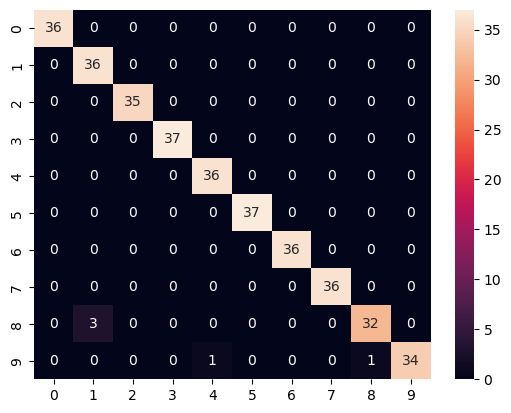

In [16]:
# Print confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.show()


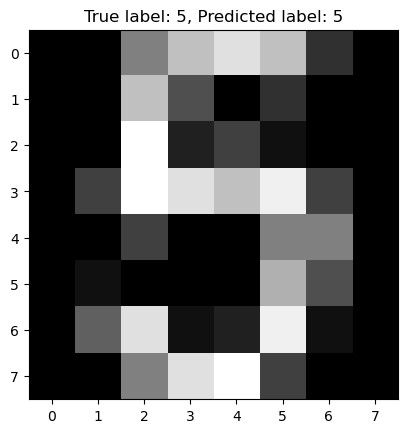

In [17]:
# Send a testing image to the model, get prediction, and visualize it
test_image_index = 0
test_image = X_test[test_image_index]
test_image_label = y_test[test_image_index]
test_image_pred = knn_best.predict(test_image.reshape(1, -1))

plt.imshow(test_image.reshape(8, 8), cmap='gray')
plt.title(f"True label: {test_image_label}, Predicted label: {test_image_pred[0]}")
plt.show()